# TP3 : Différences finies pour les équations elliptiques

In [71]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Derivative, checkodesol, sin, pi
from sympy.abc import x

Dans ce TP, on va se servir de la fonction `la.solve(A,b)` qui résoud les équations linéaires $Ax=b$ et de la commande `M = np.diagflat( vect, k )` qui crée une matrice carrée $M$ (de dimension  `len(vect)+|k|` avec les éléments du vecteur `vect` sur la  `k`-diagonale (matrice $A = (a_{ij})$, $k=0$ diagonale principale $j=i$, $k$-diagonale $j = k+i$). 

In [2]:
# Test np.diagflat

N = 5 
vect = np.ones(N-1)
M = np.diagflat(vect, -1)
M

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

Quelques rappels utiles

| | |
|-|-|
| `np.array((n, p))` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ |
| `np.ones((2,3))`, ou `np.zeros((2,3))` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ remplie de 1, ou 0 |
| `A[2,:]` (ou `A[:,2]` ) | Renvoie la 3e ligne (ou colonne) de la matrice `A` (comme vecteur 1D) |
| `max(abs(x))` |  calcule $\max_{i=1,...,N} \lvert x_i \rvert$ |


## Équation de Poisson avec conditions de Dirichlet : différences finies

On considère le problème de Poisson avec les conditions de Dirichlet homogènes, 

\begin{equation}
    \begin{cases}
    - u''(x) + u(x)  = f(x) & x\in]0,1[ \\
    u(0) = u(1) = 0, &
    \end{cases}
     \tag{$P_D$}
\end{equation}

avec $f \in \mathcal{C}^0([0,1])$. 

On veut construire une approximation de la solution $u$ par un schéma de différences finies.

Pour $N\in\mathbb{N}^*$, on pose $h = 1/(N+1)$ et on considère le maillage uniforme $x_i = ih$, pour $i=0,1,\cdots, N+1$, avec $x_0=0$ et $x_{N+1} = 1$. On cherche de calculer des valeurs d'approximation $u_i\approx u(x_i)$, pour $i=0,1,\dots, N+1$ avec les valeurs renforcées au bord $u_0 = 0$ et $u_{N+1}= 0$. Pour ce faire, on introduit la discrétisation différences finies suivante

\begin{equation} 
    \begin{cases}
    u_0 = 0 \\
    \displaystyle- \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}+ u_i = f(x_i) &i\in\{1,2,\cdots N\}\\
    u_{N+1} = 0.
    \end{cases} 
    \tag{$DF_D$}
\end{equation}

Les inconnues du problème discret sont les valeurs $u_1,u_2, \cdots u_N$. On note le vecteur solution

$$ U_h = (u_0, u_1,u_2, \cdots, u_N, u_{N+1})^T.$$

**(1)** Trouver les solutions explicites quand $f(x) = 1$ et $f(x)  = \sin(10\pi x)$ et tracer leurs graphes.


In [65]:
y = Function('y')

# Solve the ODE

result = dsolve(-Derivative(y(x), x, x) + y(x)-1)
result

Eq(y(x), C1*exp(-x) + C2*exp(x) + 1)

In [69]:
def solex_1(x):
    return 1 + (-np.exp(x)/(1+np.e)) - (np.exp(1-x)/(1+np.e))

In [73]:
y = Function('y')

# Solve the ODE

result = dsolve(-Derivative(y(x), x, x) + y(x)-sin(10 * pi * x))
result

Eq(y(x), C1*exp(-x) + C2*exp(x) + sin(10*pi*x)/(1 + 100*pi**2))

avec les conditions au bords, on a $C_1 = C_2 = 0$

In [79]:
def solex_2(x):
    return np.sin(10*np.pi*x)/(1+ 100 * np.pi**2)


**(2)** Définir dans une fonction Python `MDF(N,fct)` qui construit la matrice $A_h$ et le vecteur $F_h$ tels que le système discret ($DF_D$) s'écrit de manière équivalente sous la forme vectorielle
\begin{equation}
A_h U_h = F_h
\end{equation}

où $F_h = (0, f(x_1), f(x_2), \cdots f(x_N), 0)^T$.

In [129]:
def MDF(N,fct):
    h = 1/(N+1)
    
    # matrice diagonale 
  
    vect0 = np.repeat(2/(h**2),N+1)
    vect0[0] = 1
    vect0[-1] = 1
    A0 = np.diagflat(vect0, 0)
    
    # matrice supérieure
    vect1 = np.repeat(-1/(h**2),N)
    A1 = np.diagflat(vect1, 1)
   
    # matrice inférieure

    A2 = np.diagflat(vect1, -1)
 

    Ah = A0 + A1 +A2
    Ah[0,1] = 0
    Ah[-1,-2] = 0
    
    
    # Fh
    Fh = np.zeros((N+1,1))
    Fh[1:N,0] = fct(np.linspace(0,1,N+1)[1:N])
    Fh[0,0] = 0
    Fh[-1,0] = 0


    return Ah, Fh

In [130]:
Ah,Fh = MDF(4,lambda x: 1)
Ah,Fh

(array([[  1.,   0.,   0.,   0.,   0.],
        [-25.,  50., -25.,   0.,   0.],
        [  0., -25.,  50., -25.,   0.],
        [  0.,   0., -25.,  50., -25.],
        [  0.,   0.,   0.,   0.,   1.]]),
 array([[0.],
        [1.],
        [1.],
        [1.],
        [0.]]))

In [131]:
la.solve(Ah,Fh)

array([[-0.  ],
       [ 0.06],
       [ 0.08],
       [ 0.06],
       [ 0.  ]])

**(3)** Poser ensuite une fonction `FDS(N,fct)` qui calcule la solution approchée pour différentes valeurs de $N$ et qui renvoie le vecteur `$[x,h,U_h]$`. 

In [132]:
def FDS(N, fct):
    Ah,Fh = MDF(N,fct)
    Uh = la.solve(Ah,Fh)
    x = np.linspace(0,1,N+1)
    h = 1/(N+1)
    return x, h, Uh

**(4)** Tracer en pointillé les solutions approchées à côté des solutions exactes.

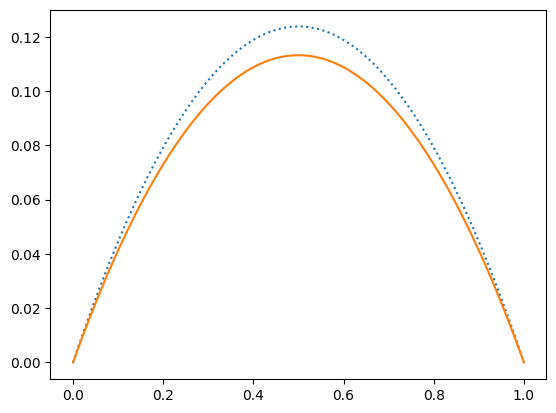

In [135]:
x, h, Uh = FDS(200,lambda x : 1)
plt.plot(x,Uh[:,0],":")
plt.plot(x,solex_1(x))

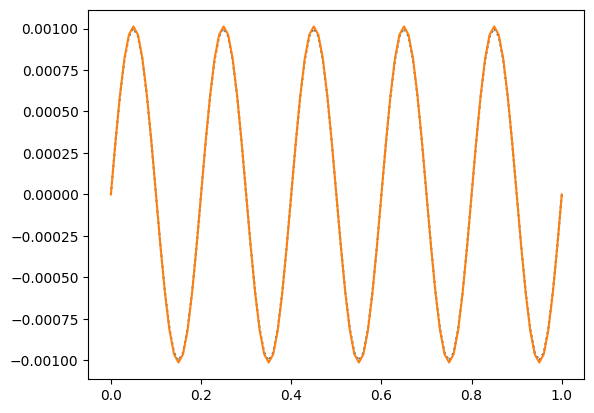

In [122]:
x, h, Uh = FDS(100,lambda x : np.sin(10*np.pi*x))
plt.plot(x,Uh[:,0],":")
plt.plot(x,solex_2(x))

**(5)** Calculer pour $h = 1/2^k$ avec $k =1,2, \dots,8$, l'erreur 
$$
E(h)= \left\| U - \Pi_h(u) \right\|_\infty,
$$

à l'aide de la commande `max(abs())`, pour $f =1$.

In [123]:
Kmax = 8
H = np.zeros(Kmax)
Eh = np.zeros(Kmax)
for k in range(Kmax):
    x, h, Uh = FDS(2**(k+1),lambda x : 1)
    
    H[k] = 1/(2**(k+1))
    Eh[k] = np.max(np.abs(Uh.reshape(-1) - solex_1(x)))

**(6)** Tracer  à l'échelle logarithmique, en utilisant `plt.loglog(...)`, cette erreur en fonction de $h$ et vérifier que la méthode est d'ordre $2$.

In [124]:
Eh

array([0.05762556, 0.03318112, 0.01441568, 0.00245447, 0.00435791,
       0.00800232, 0.00988841, 0.01084801])

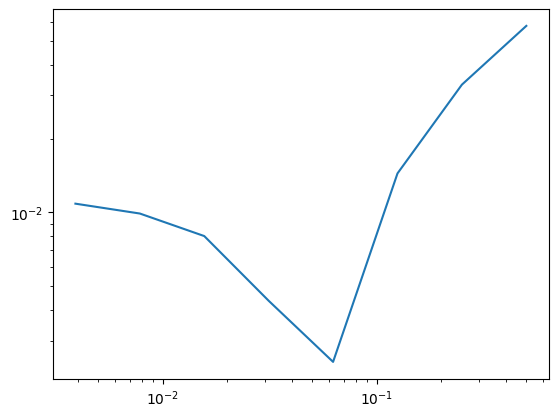

In [125]:
plt.loglog(H,Eh)


## Équation de Poisson avec conditions de Neumann : différences finies

Dans cette partie, on considère le problème de Poisson avec les conditions de Neumann, 

\begin{equation}
    \begin{cases}
    - u''(x) + u(x)  = f(x) & x\in]0,1[  \\
    -u'(0) = g_0, u'(1) = g_1, &
    \end{cases}
     \tag{PN}
\end{equation}

avec $f \in \mathcal{C}^0([0,1])$. 

### Schéma d'ordre $1$ (Exercice $1$ du TD3)

On veut construire une approximation de la solution $u$ par un schéma de différences finies.

Pour $N\in\mathbb{N}^*$, on pose $h = 1/(N+1)$ et on considère le maillage uniforme $x_i = ih$, pour $i=0,1,\cdots, N+1$, avec $x_0=0$ et $x_{N+1} = 1$ et pour approcher les conditions aux limites de Neumann, on utilise les dérivées discrètes à gauche et à droite de $u$ :

$$
    \begin{split}
    -u'(0) &\simeq -D_+ u(0) = \frac{u(0)-u(h)}{h} = \frac{u(x_0)-u(x_1)}{h}, \\
    u'(1) &\simeq D_- u(1) = \frac{u(1)-u(1-h)}{h} = \frac{u(x_{N+1})-u(x_N)}{h}.
    \end{split}
$$

Le schéma numérique s'écrit alors 

\begin{equation} 
    \begin{cases}
    \displaystyle-\frac{u_0 - u_1}{h} = g_0 \\
    \displaystyle- \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}+ u_i = f(x_i) &i\in\{1,2,\cdots N\}\\
    \displaystyle-\frac{u_{N+1} - u_N}{h} = g_1.
    \end{cases} 
\end{equation}

**(1)** Trouver la solution explicite quand $f(x) = 1$ et $g_0 = g_1 = 1$ et tracer son graphe.

In [ ]:
def solex(x):
    la = 
    return


**(2)** Définir dans une fonction Python `NMDF(N,fct)` qui construit la matrice $A_h$ et le vecteur $F_h$ tels que le système discret ($DF_N$) s'écrive de la manière suivante 
\begin{equation}
A_h U_h = F_h
\end{equation}

où $F_h = (g_0, f(x_1), f(x_2), \cdots f(x_N), g_1)^T$.

In [47]:
def NFDM(N,fct,g0,g1):
    h = 1/(N+1)
    
    # matrice diagonale 
    
    vect0 = np.repeat(2/(h**2),N+1)
    vect0[0] = 1/h
    vect[-1] = 1/h
    A0 = np.diagflat(vect0, 0)
    
    # matrice supérieure
    vect1 = np.repeat(-1/(h**2),N)
    A1 = np.diagflat(vect1, 1)
   
    # matrice inférieure

    A2 = np.diagflat(vect1, -1)
 

    Ah = A0 + A1 +A2
    Ah[0,1] = -1/h
    Ah[-1,-2] = -1/h
    
    # Fh
    Fh = np.zeros((N+1,1))
    Fh[1:N,0] = fct(np.linspace(0,1,N+1)[1:N])
    Fh[0,0] = g0
    Fh[-1,0] = g1

    return Ah, Fh

In [49]:
Ah,Fh = NFDM(4,lambda x: 1,1,1)
Ah,Fh

(array([[  5.,  -5.,   0.,   0.,   0.],
        [-25.,  50., -25.,   0.,   0.],
        [  0., -25.,  50., -25.,   0.],
        [  0.,   0., -25.,  50., -25.],
        [  0.,   0.,   0.,  -5.,  50.]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

**(3)** Poser ensuite une fonction `FDSN(N,fct,g0,g1)` qui calcule la solution approchée pour différentes valeurs de $N$ et qui renvoie le vecteur `$[x,h,U_h]$`. 

In [50]:
def FDSN(N, fct,g0 , g1):
    Ah,Fh = NFDM(N,fct,g0,g1)
    Uh = la.solve(Ah,Fh)
    x = np.linspace(0,1,N+1)
    h = 1/(N+1)
    return x, h, Uh

**(4)** Tracer en pointillés la solution approchée à côté de la solution exacte pour $f\equiv 1$, $g_0=g_1=1$ et `N =500`.

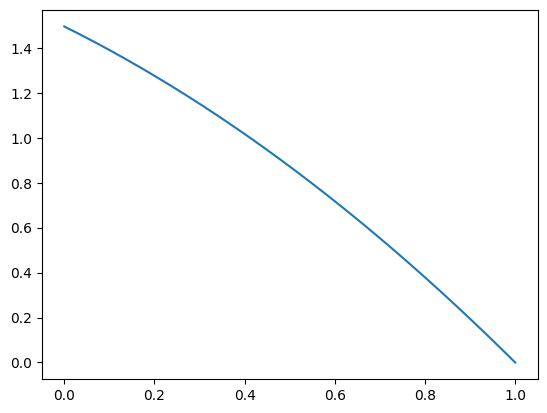

In [51]:
x, h, Uh = FDSN(500,lambda x : 1,1,1)
plt.plot(x,Uh[:,0])   



**(5)** Calculer pour $h = 1/2^k$ avec $k =1,2, \dots,8$, l'erreur 
$$
E(h)= \left\| U - \Pi_h(u) \right\|_\infty,
$$

à l'aide de la commande `max(abs())`, pour $f \equiv 1$, $g_0=g_1=1$. Puis tracer à l'échelle logarithmique, en utilisant `plt.loglog(...)`, cette erreur en fonction de $h$ et vérifier que la méthode est d'ordre $2$.

### Schéma à l'ordre 2 (Exercice 2 du TD3)

Dans cette partie, on utilise une nouvelle méthode imposant les conditions aux limites avec des différences finies centrées de $u$

$$
    D_c u(0) = \frac{u(h)-u(-h)}{2h}  \quad \text{et} \quad D_c u(1) = \frac{u(1+h)-u(1-h)}{2h}.
$$

Dans ce cas, le maillage étendu est $x_{-1} = - h < x_0 < x_1 < \cdots < x_{N+1} < x_{N+2} = 1+h$, les points du maillage $x_i = i h$ pour $h = 1 / (N+1)$, $N \in \mathbb{N}^*$ et $i = -1, \dots, N+2$, et l'opérateur échantillonnage associé $\Pi_h : C([0,1]) \to \mathbb{R}^{N+4}$

$$
    \Pi_h(u) = [u(x_{-1}), u(x_0), u(x_1), \dots, u(x_{N+1}), u(x_{N+2})]^T.
$$

où on suppose que les valeurs $u(x_{-1})$ et $u(x_{N+2})$ sont obtenues par extrapolation (d'ordre suffisamment élevé). On obtient la méthode suivante

\begin{equation}
    \begin{cases}
        \displaystyle -\frac{u_{i+1}-2u_{i}+u_{i-1}}{h^2} + c(x_i) u_{i} = f(x_i) &i = 0, \dots, N+1\\
        \displaystyle \frac{u_{-1} - u_{1}}{2h} = g_0, \, \frac{u_{N+2} - u_{N}}{2h} = g_1.
    \end{cases}
    \tag{$DF_{NC}$}
\end{equation}

**(1)** Reprenez les étapes du schéma d'ordre $1$ pour calculer la solution et tracer sur un même graphique les solutions trouvées avec ($DF_N$) et ($DF_{NC}$) dans le cas $f\equiv 1$ et $g_0= g_1 =1$.

In [ ]:
def NCFDM(N,fct,g0,g1):
    h = 1/(N+1)

    # matrice diagonale 

    
    
    A0 = np.diagflat(vect0, 0)
    
    
    
    # matrice supérieure 
    A1 = np.diagflat(vect1, 1)

    
    # matrice inférieure
    A2 = np.diagflat(vect1, -1)

    
    Ah = A0 + A1 +A2
    
    ## x, Fh
    x = np.linspace(0,1,N+2)
    Fh = fct(x)

    #x = [-h ,x ,1+h ]

    
    #Fh = [g0, F, g1]
  
    
    return Ah, Fh

In [ ]:
# Test 

N=8
g0 = 2
g1 = 2
Ah , Fh = NCFDM(N,fct1,g0,g1)
print(Ah)
print(Fh)

In [ ]:
def FDSNC(N, fct,g0 , g1):


    
    
    
    
    return X, h, Uh

**(2)** Calculer pour $h = 1/2^k$ avec $k =1,2, \dots,8$, l'erreur 
$$
E(h)= \left\| U - \Pi_h(u) \right\|_\infty,
$$

à l'aide de la commande `max(abs())`, pour $f \equiv 1$, $g_0=g_1=1$. Puis tracer à l'échelle logarithmique, en utilisant `plt.loglog(...)`, cette erreur en fonction de $h$ et vérifier que la méthode est d'ordre $2$.

# Exercice : Condition de Neumann/Dirichlet

Combiner les deux dernières sections pour développer deux shémas d'ordre $1$ et $2$ respectivement, pour résoudre 

\begin{equation}
    \begin{cases}
    - u''(x) + u(x)  = 1 & x\in]0,1[ \\
    u'(0) = 1, \, u(1) = 0. &
    \end{cases}
\end{equation}

**Attention :** on a $u'(0)=1$ et non pas $-u'(0)= 1$ comme précédement !